**ABOUT THE DATASET**

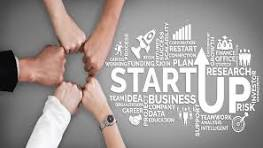

**The dataset is completely based on the companys information fromcompanyswebsite database of 2013.Features: All the columns with the companys information like name, permalink, category, funding dates, funding rounds, funding amount, city, state, founding dates, last milestone dates and many more.Label: Status.**

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection


**MOUNTING TO GOOGLE DRIVE**

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING THE DATASET**

In [3]:
data= pd.read_csv("/content/drive/MyDrive/companies.csv")

In [4]:
data

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


**TOTAL NO OF ROWS AND COLUMNS IN DATASET**

In [5]:
data.shape

(196553, 44)

In [6]:
data.duplicated().sum()

0

**REPRESENTING THE COLUMNS NAMES**

In [7]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

**DATA ID**

'id': An identifier for each entry, likely a unique identifier for each record.

'Unnamed: 0.1': An additional identifier or index, possibly unnecessary. It seems to be an unnamed column that may duplicate the index.

'entity_type': The type of entity, providing information about the nature of the recorded data (e.g., company, organization).

'entity_id': Identifier for the entity.

'parent_id': Identifier for the parent entity if applicable.

'name': The name of the entity.

'normalized_name': The normalized version of the entity's name.

'permalink': A permanent link or URL associated with the entity.

'category_code': The category or industry code associated with the entity.

'status': The current status of the entity (e.g., operational, closed).

'founded_at': The date when the entity was founded.

'closed_at': The date when the entity was closed, if applicable.

'domain': The domain associated with the entity.

'homepage_url': The URL of the entity's homepage.

'twitter_username': The Twitter username associated with the entity.

'logo_url', 'logo_width', 'logo_height': Details about the entity's logo, including its URL and dimensions.

'short_description', 'description', 'overview', 'tag_list': Text-based descriptions and tags providing more information about the entity.

'country_code', 'state_code', 'city', 'region': Geographical details of the entity's location.

'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies': Information related to the entity's investments.

'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd': Details about the entity's funding, including dates and amounts.

'first_milestone_at', 'last_milestone_at', 'milestones': Information related to the entity's milestones.

'relationships', 'created_by', 'created_at', 'updated_at': Details about the relationships, creator, and timestamps of the entity.

'lat', 'lng': Latitude and longitude information.

'ROI': A column that seems to represent Return on Investment. It's not clear how this metric is calculated without more context.

**CHECKING THE NULLVALUES**

In [8]:
data.info(verbose=True, null_counts=True)

<ipython-input-8-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

**SUMMARY STATISTICS**

In [9]:
# Display summary statistics for numerical columns
print(data.describe())


        Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
min             1.00000

**CHECKING THE MISSING VALUES**

In [10]:
# Check for missing values
print(data.isnull().sum())


id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

**CALCULATING THE NULL VALUES PERCENTAGE**

In [11]:
# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': data.columns, 'Null Percentage': null_percentage})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)

# Display the DataFrame
print(null_percentage_df)


                                  Column  Null Percentage
parent_id                      parent_id       100.000000
ROI                                  ROI        99.630634
first_investment_at  first_investment_at        98.685851
last_investment_at    last_investment_at        98.685851
investment_rounds      investment_rounds        98.681780
invested_companies    invested_companies        98.681780
closed_at                      closed_at        98.667026
short_description      short_description        96.371971
funding_total_usd      funding_total_usd        85.818583
last_funding_at          last_funding_at        83.970227
first_funding_at        first_funding_at        83.970227
funding_rounds            funding_rounds        83.868473
state_code                    state_code        74.102151
twitter_username        twitter_username        58.997828
tag_list                        tag_list        58.559778
lat                                  lat        57.338733
lng           

**DROPPING THE UNWANTED COLUMNS**

**'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview', 'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at', 'last_milestone_at','first_funding_at','last_funding_at','lat','lng'**













**Dropping all these columns because1.Some columns are empty2.Unwanted object columns3.70% of Null values present in the columns4.Empty columns5.Unnecessary columns**



In [12]:
data = data.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,2005-10-17,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN


**AFTER DROPPING UNWANTED COLUMNS HERE IS THE SHAPE OF THE DATASET**

In [13]:
data.shape

(196553, 16)

**DROPPING SOME NULL VALUES OF SOME SELECTED COLUMNS**

In [14]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

**FILLING THE INVESTMENT_ROUNDS NULL VALUES WITH MEDIAN**

In [15]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

**COUNTING THE VALUES OF INVESTED_COMPANIES VALUES**

In [16]:
data['invested_companies'].value_counts()

1.0      460
2.0      104
3.0       56
4.0       26
5.0       23
6.0       14
7.0       13
14.0       6
16.0       5
9.0        4
8.0        4
11.0       2
10.0       2
29.0       2
38.0       2
26.0       2
18.0       2
24.0       2
21.0       2
20.0       2
57.0       1
68.0       1
44.0       1
124.0      1
12.0       1
39.0       1
79.0       1
268.0      1
30.0       1
73.0       1
459.0      1
33.0       1
13.0       1
47.0       1
17.0       1
51.0       1
Name: invested_companies, dtype: int64

**FILLING THE INVESTMENT_COMPANIES NULL VALUES WITH MEDIAN**

In [17]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

**COUNTING THE VALUES OF FUNDING_ROUNDS VALUES**

In [18]:
data['funding_rounds'].value_counts()

1.0     13378
2.0      4964
3.0      2367
4.0      1100
5.0       561
6.0       239
7.0       136
8.0        62
9.0        42
10.0       22
11.0       10
13.0        4
12.0        3
15.0        2
14.0        1
Name: funding_rounds, dtype: int64

**FILLING THE FUNDING_ROUNDS NULL VALUES WITH MEDIAN**

In [19]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

**FILLING THE FUNDING_ROUNDS NULL VALUES WITH MEAN**

In [20]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

**COUNTING THE VALUES OF MILESTONES VALUES**

In [21]:
data['milestones'].value_counts()

1.0    24691
2.0     7478
3.0     2478
4.0      458
5.0      139
6.0       45
7.0        7
8.0        3
9.0        1
Name: milestones, dtype: int64

**FILLING THE MILESTONES NULL VALUES WITH MODE**

In [22]:
data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

**COUNTING THE VALUES OF RELATIONSHIPS VALUES**

In [23]:
data['relationships'].value_counts()

1.0      13943
2.0      10982
3.0       7221
4.0       4384
5.0       2723
         ...  
183.0        1
155.0        1
122.0        1
387.0        1
67.0         1
Name: relationships, Length: 137, dtype: int64

**FILLING THE RELATIONSHIPS NULL VALUES WITH MEAN**

In [24]:
data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

**COUNTING THE VALUES OF ROI VALUES**

In [25]:
data['ROI'].value_counts()

10.000000    6
15.000000    4
16.666667    3
3.333333     3
5.000000     3
            ..
57.777778    1
0.232143     1
7.788945     1
0.675219     1
24.137931    1
Name: ROI, Length: 504, dtype: int64

**FILLING THE ROI NULL VALUES WITH MEAN**

In [26]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

**CONVERTING THE FOUNDED_AT COLUMN INTO DATETIME FORMAT**

In [27]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

**FILLING THE FOUNDED_AT NULL VALUES WITH MODE**

In [28]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

**CONVERTING THE CLOSED_AT COLUMN INTO DATETIME FORMAT**

In [29]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

**FILLING THE CLOSED_AT NULL VALUES WITH MODE**

In [30]:
data['closed_at'].mode()[0]

2012.0

**THE CODE WILL FILL THE MISSING VALUES IN CLOSED_AT IN 2021 FOR OPERATING OR IPO AND WITH 2012 WITH ACQYIRED AND CLOSED**

In [31]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

**UPDATEING THE DATECOLUMN AND TAKING ONLY THE YEAR FROM CREATED_AT COLUMN**

In [32]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

**UPDATEING THE DATECOLUMN AND TAKING ONLY THE YEAR FROM UPDATED_AT COLUMN**

In [33]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

**ADDING NEW UPDATED COLUMNS**

**ADDING COMPANY AGE IN YEARS BY SUBTRATING THE FOUNDED AT FROM CLOSED AT**

In [34]:
data['companies_age'] = data['closed_at'] - data['founded_at']

**AFTER SUBTRACTING WE HAVE SOME NEGATIVE VALUES SO PLEASE REMOVE SOME NEGATIVE VALUES**

In [35]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

**FILLING THE NULLVALUES OF COMPANY AGE WITH 0**

In [36]:
data['companies_age'] = data['companies_age'].fillna(0)


In [37]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,2007,2013,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0


**CHECKING THE NULLVALUES IN THE DATASET**

In [38]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

**RESET THE INDEX**

In [39]:
data.reset_index(inplace = True)

**SHAPE OF THE DATASET**

In [40]:
data.shape

(64094, 18)

**AFTER DATACLEANING THE UPDATED DATASET COLUMNS**

In [41]:
data.columns


Index(['index', 'entity_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'country_code', 'investment_rounds', 'invested_companies',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'created_at', 'updated_at', 'ROI', 'companies_age'],
      dtype='object')

# EDA

**UNIVARIATE PLOTS**


**DISTRIBUTION OF INVESTMENT ROUNDS[HISTOGRAM]**

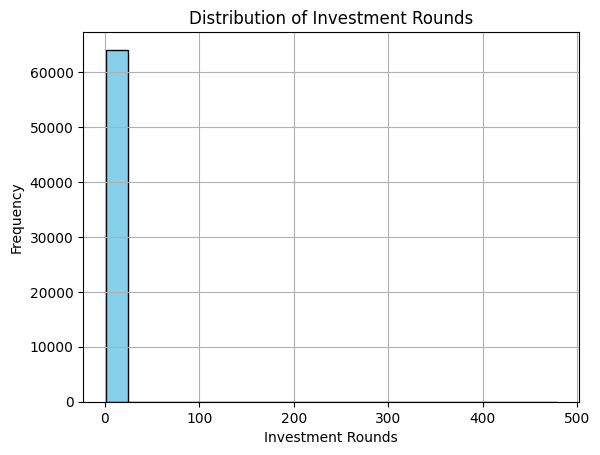

In [42]:
import matplotlib.pyplot as plt
data['investment_rounds'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Investment Rounds')
plt.ylabel('Frequency')
plt.title('Distribution of Investment Rounds')
plt.show()


**DISTRIBUTION OF CATEGORY CODES[COUNT PLOT]**

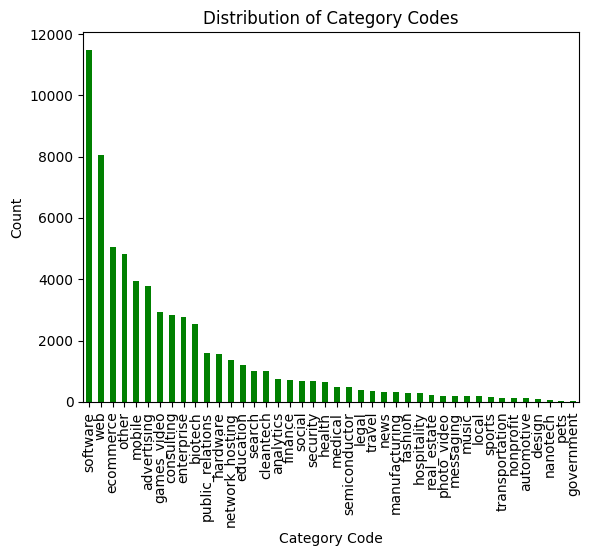

In [43]:
import matplotlib.pyplot as plt
data['category_code'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Category Code')
plt.ylabel('Count')
plt.title('Distribution of Category Codes')
plt.show()


**BOXPLOT FOR FUNDING TOTAL**

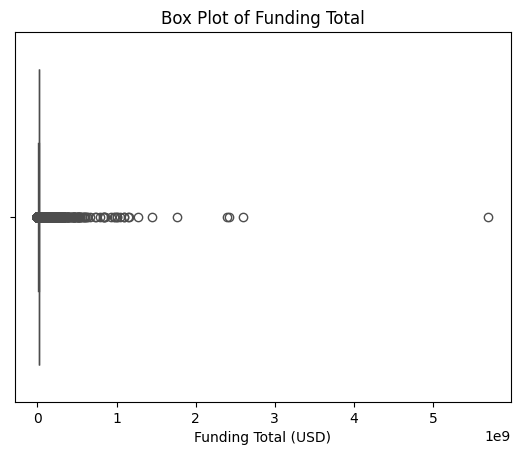

In [44]:
import seaborn as sns
sns.boxplot(x=data['funding_total_usd'], color='orange')
plt.xlabel('Funding Total (USD)')
plt.title('Box Plot of Funding Total')
plt.show()


**HISTOGRAM FOR FUNDING TOTAL**

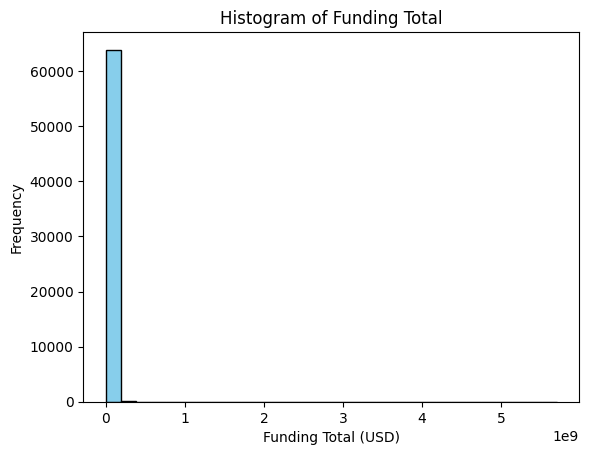

In [45]:
import matplotlib.pyplot as plt

plt.hist(data['funding_total_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Funding Total')
plt.show()


**DISTRIBUTION OF ENTITY STATUS[BARPLOT]**

<ipython-input-46-95160525283c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=data, palette='viridis')


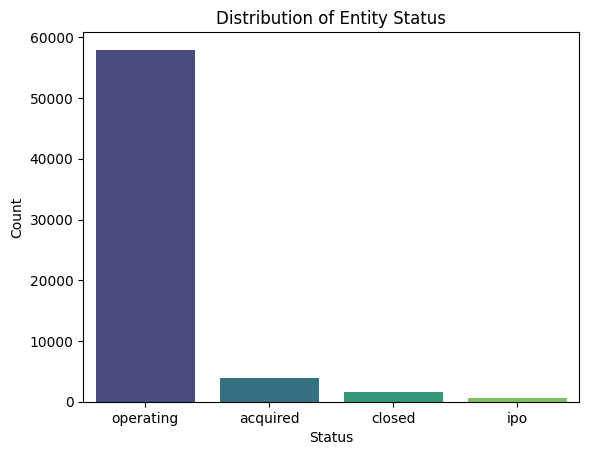

In [46]:
import seaborn as sns

sns.countplot(x='status', data=data, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Entity Status')
plt.show()


**FUNDING TOTAL OVER TIME[LINE PLOT]**

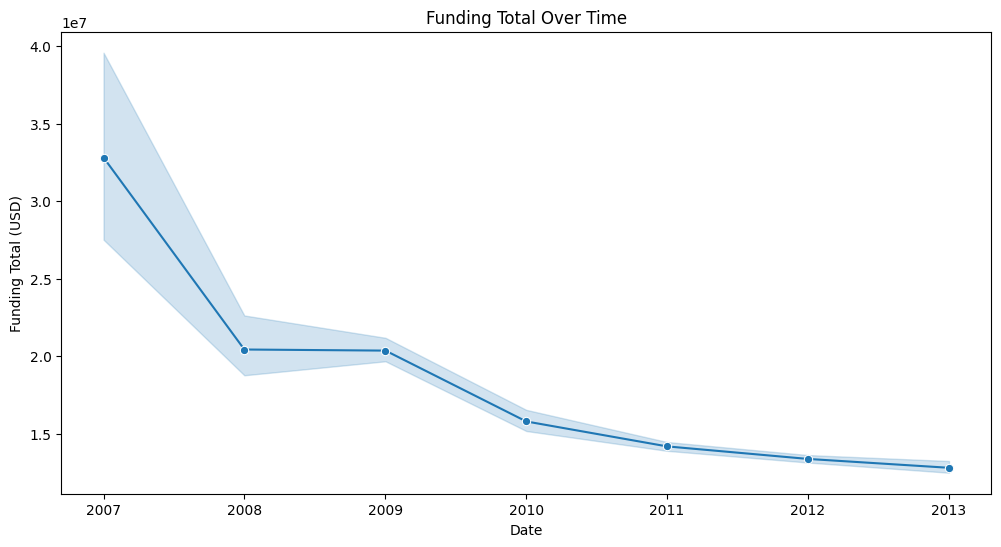

In [47]:
import seaborn as sns

data['created_at'] = pd.to_datetime(data['created_at'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='funding_total_usd', data=data, marker='o')
plt.xlabel('Date')
plt.ylabel('Funding Total (USD)')
plt.title('Funding Total Over Time')
plt.show()


**CATEGORY CODE [HISTOGRAM]**

<Axes: xlabel='category_code', ylabel='Count'>

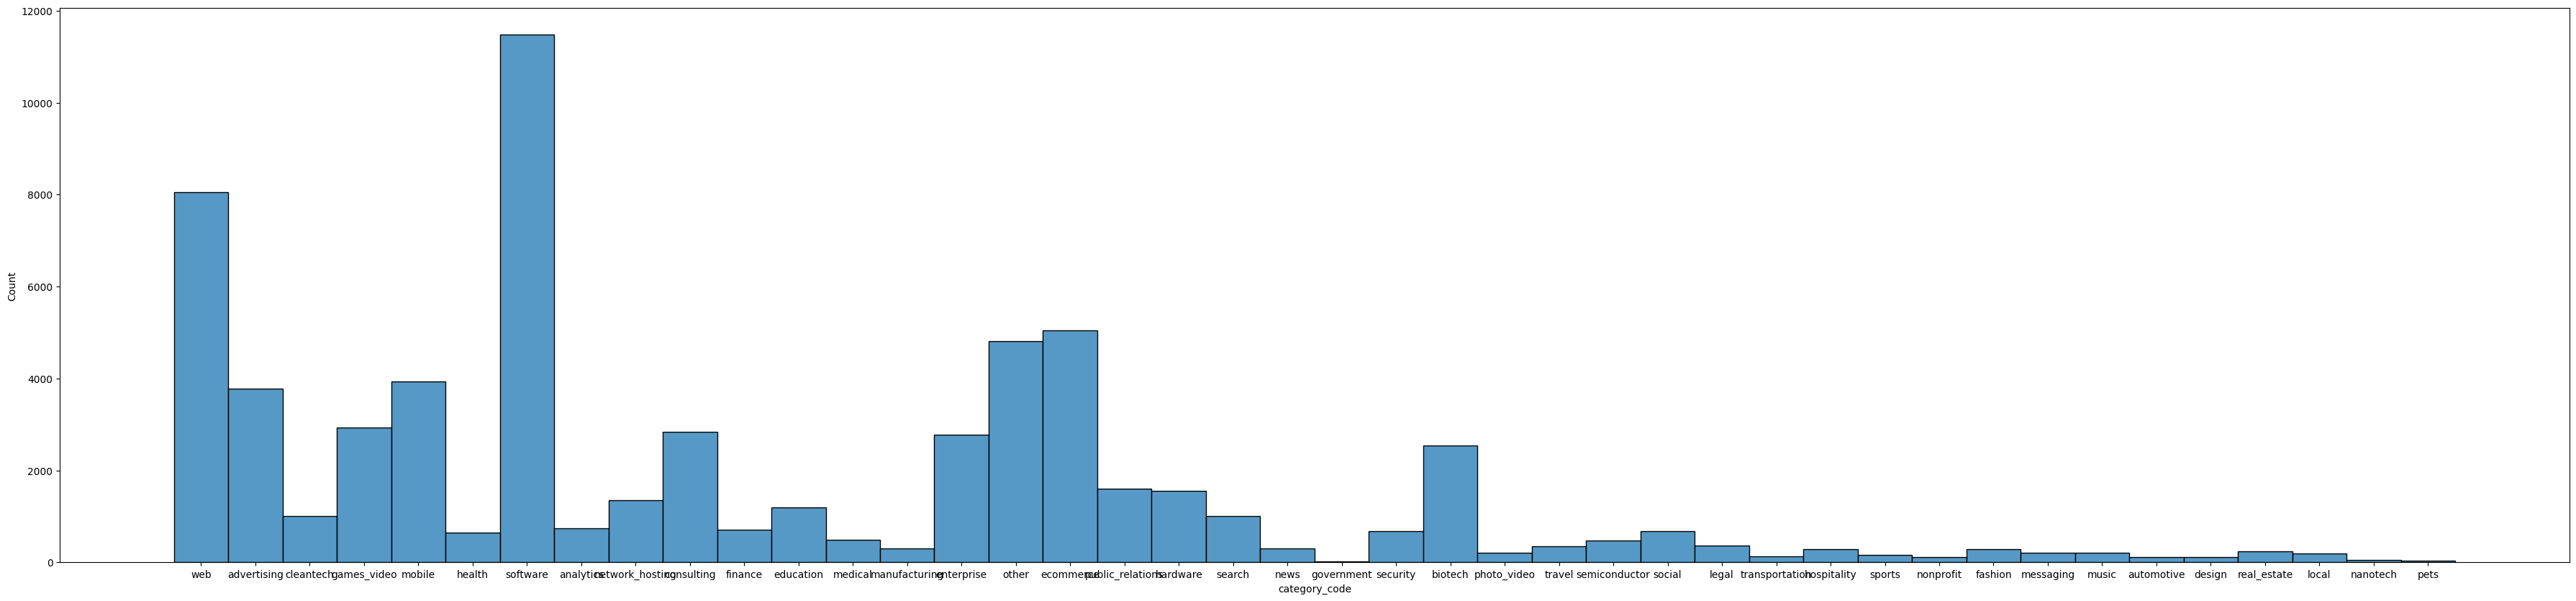

In [48]:
plt.figure(figsize= (45,10))
sns.histplot(data.category_code)

**BIVARIATE PLOTS**

**FUNDING_ROUNDS VS FUNDING_TOTAL_USD[SCATTERPLOT]**

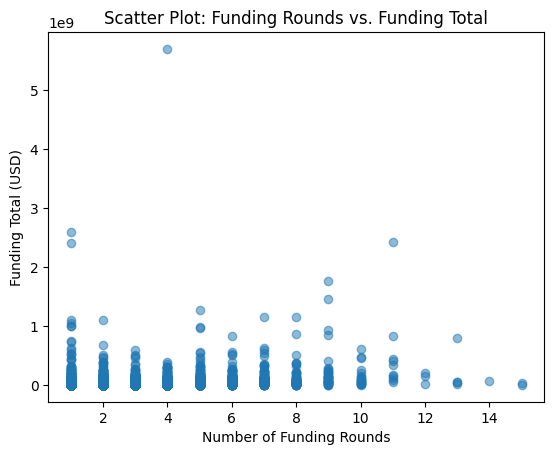

In [49]:
plt.scatter(data['funding_rounds'], data['funding_total_usd'], alpha=0.5)
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Funding Total (USD)')
plt.title('Scatter Plot: Funding Rounds vs. Funding Total')
plt.show()


**CREATED_AT VS UPDATED_AT DENSITY PLOT**

<ipython-input-50-8cf9a8f51993>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-50-8cf9a8f51993>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


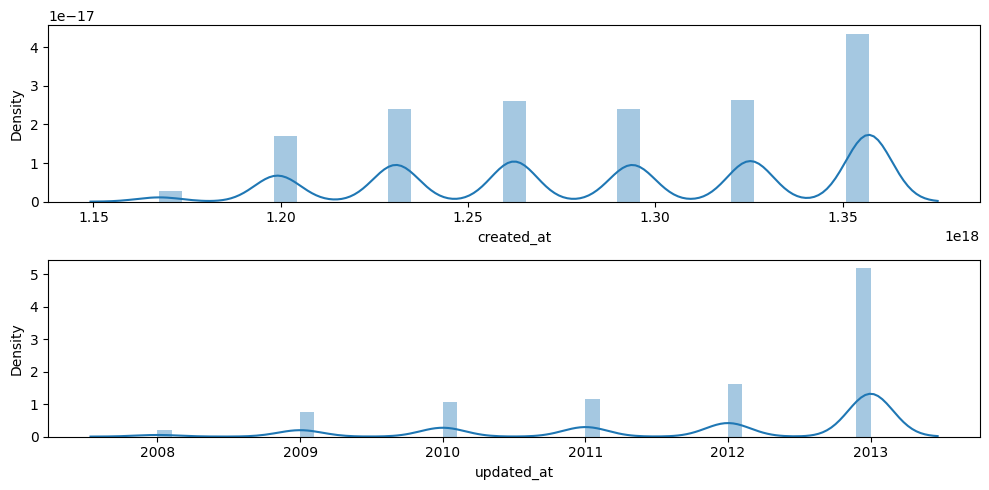

In [50]:
plt.figure(figsize=(10,5))
plotnumber = 1

for column in data[['created_at','updated_at']]:
    if plotnumber <= 2:
        ax = plt.subplot(2,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)

    plotnumber+=1
plt.tight_layout()

**MULTIVARIATE PLOTS**

**3D SCATTERPLOT OF SELECTED VARIABLES**

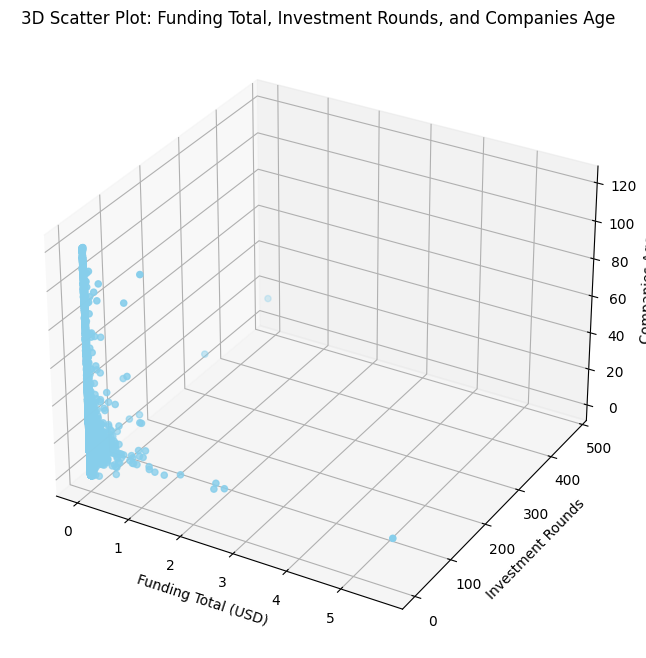

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['funding_total_usd'], data['investment_rounds'], data['companies_age'], c='skyblue', marker='o')
ax.set_xlabel('Funding Total (USD)')
ax.set_ylabel('Investment Rounds')
ax.set_zlabel('Companies Age')
ax.set_title('3D Scatter Plot: Funding Total, Investment Rounds, and Companies Age')
plt.show()


**BUBBLE PLOT OF SELECTED VARIABLES**

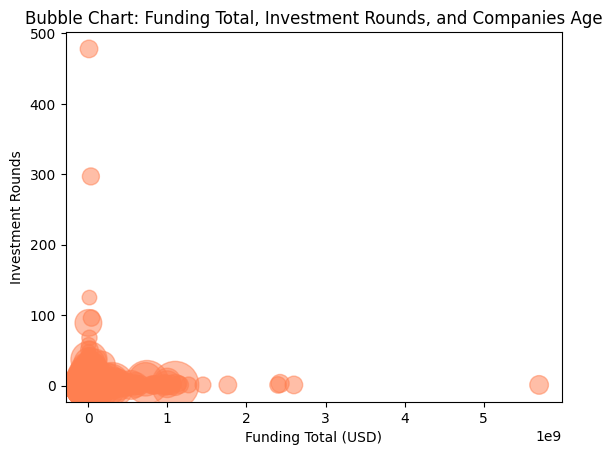

In [52]:
plt.scatter(data['funding_total_usd'], data['investment_rounds'], s=data['companies_age']*10, alpha=0.5, c='coral')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Investment Rounds')
plt.title('Bubble Chart: Funding Total, Investment Rounds, and Companies Age')
plt.show()


**PARALLEL COORDINATES PLOT OF SELECTED VARIABLES**

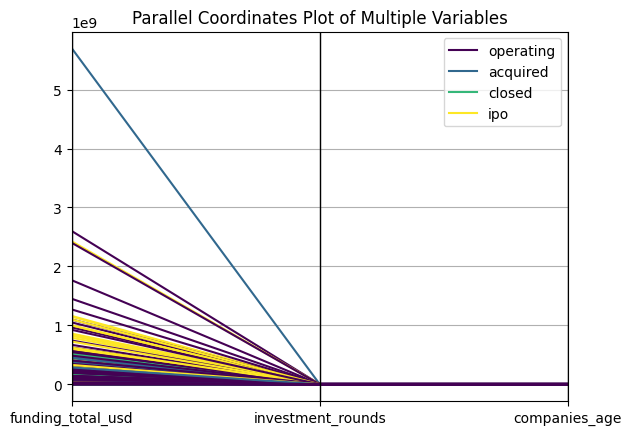

In [53]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data[['funding_total_usd', 'investment_rounds', 'companies_age', 'status']], 'status', colormap='viridis')
plt.title('Parallel Coordinates Plot of Multiple Variables')
plt.show()


**FEATURE ENGINEERING**

**CORRELATION OF DATASET**

In [54]:
df_corr = data.corr().abs()

<ipython-input-54-a21546e3f5df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data.corr().abs()


**HEATMAP**

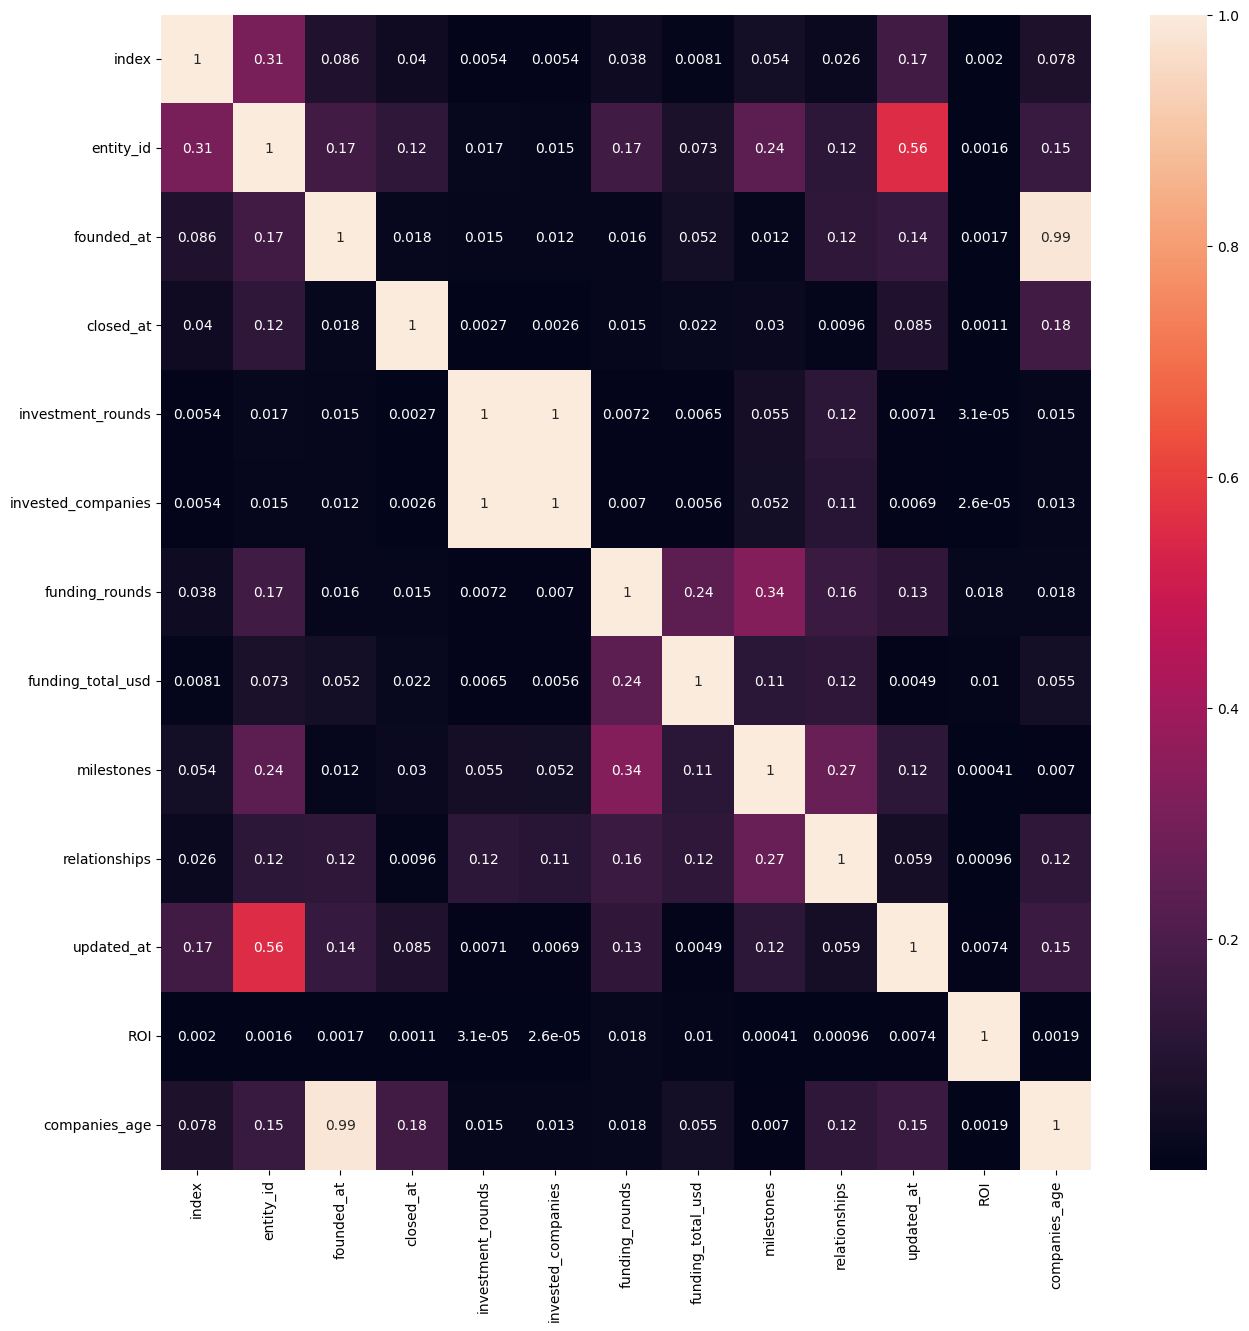

In [55]:
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)
plt.show()

**PAIRPLOT FOR ALL VARIABLES**

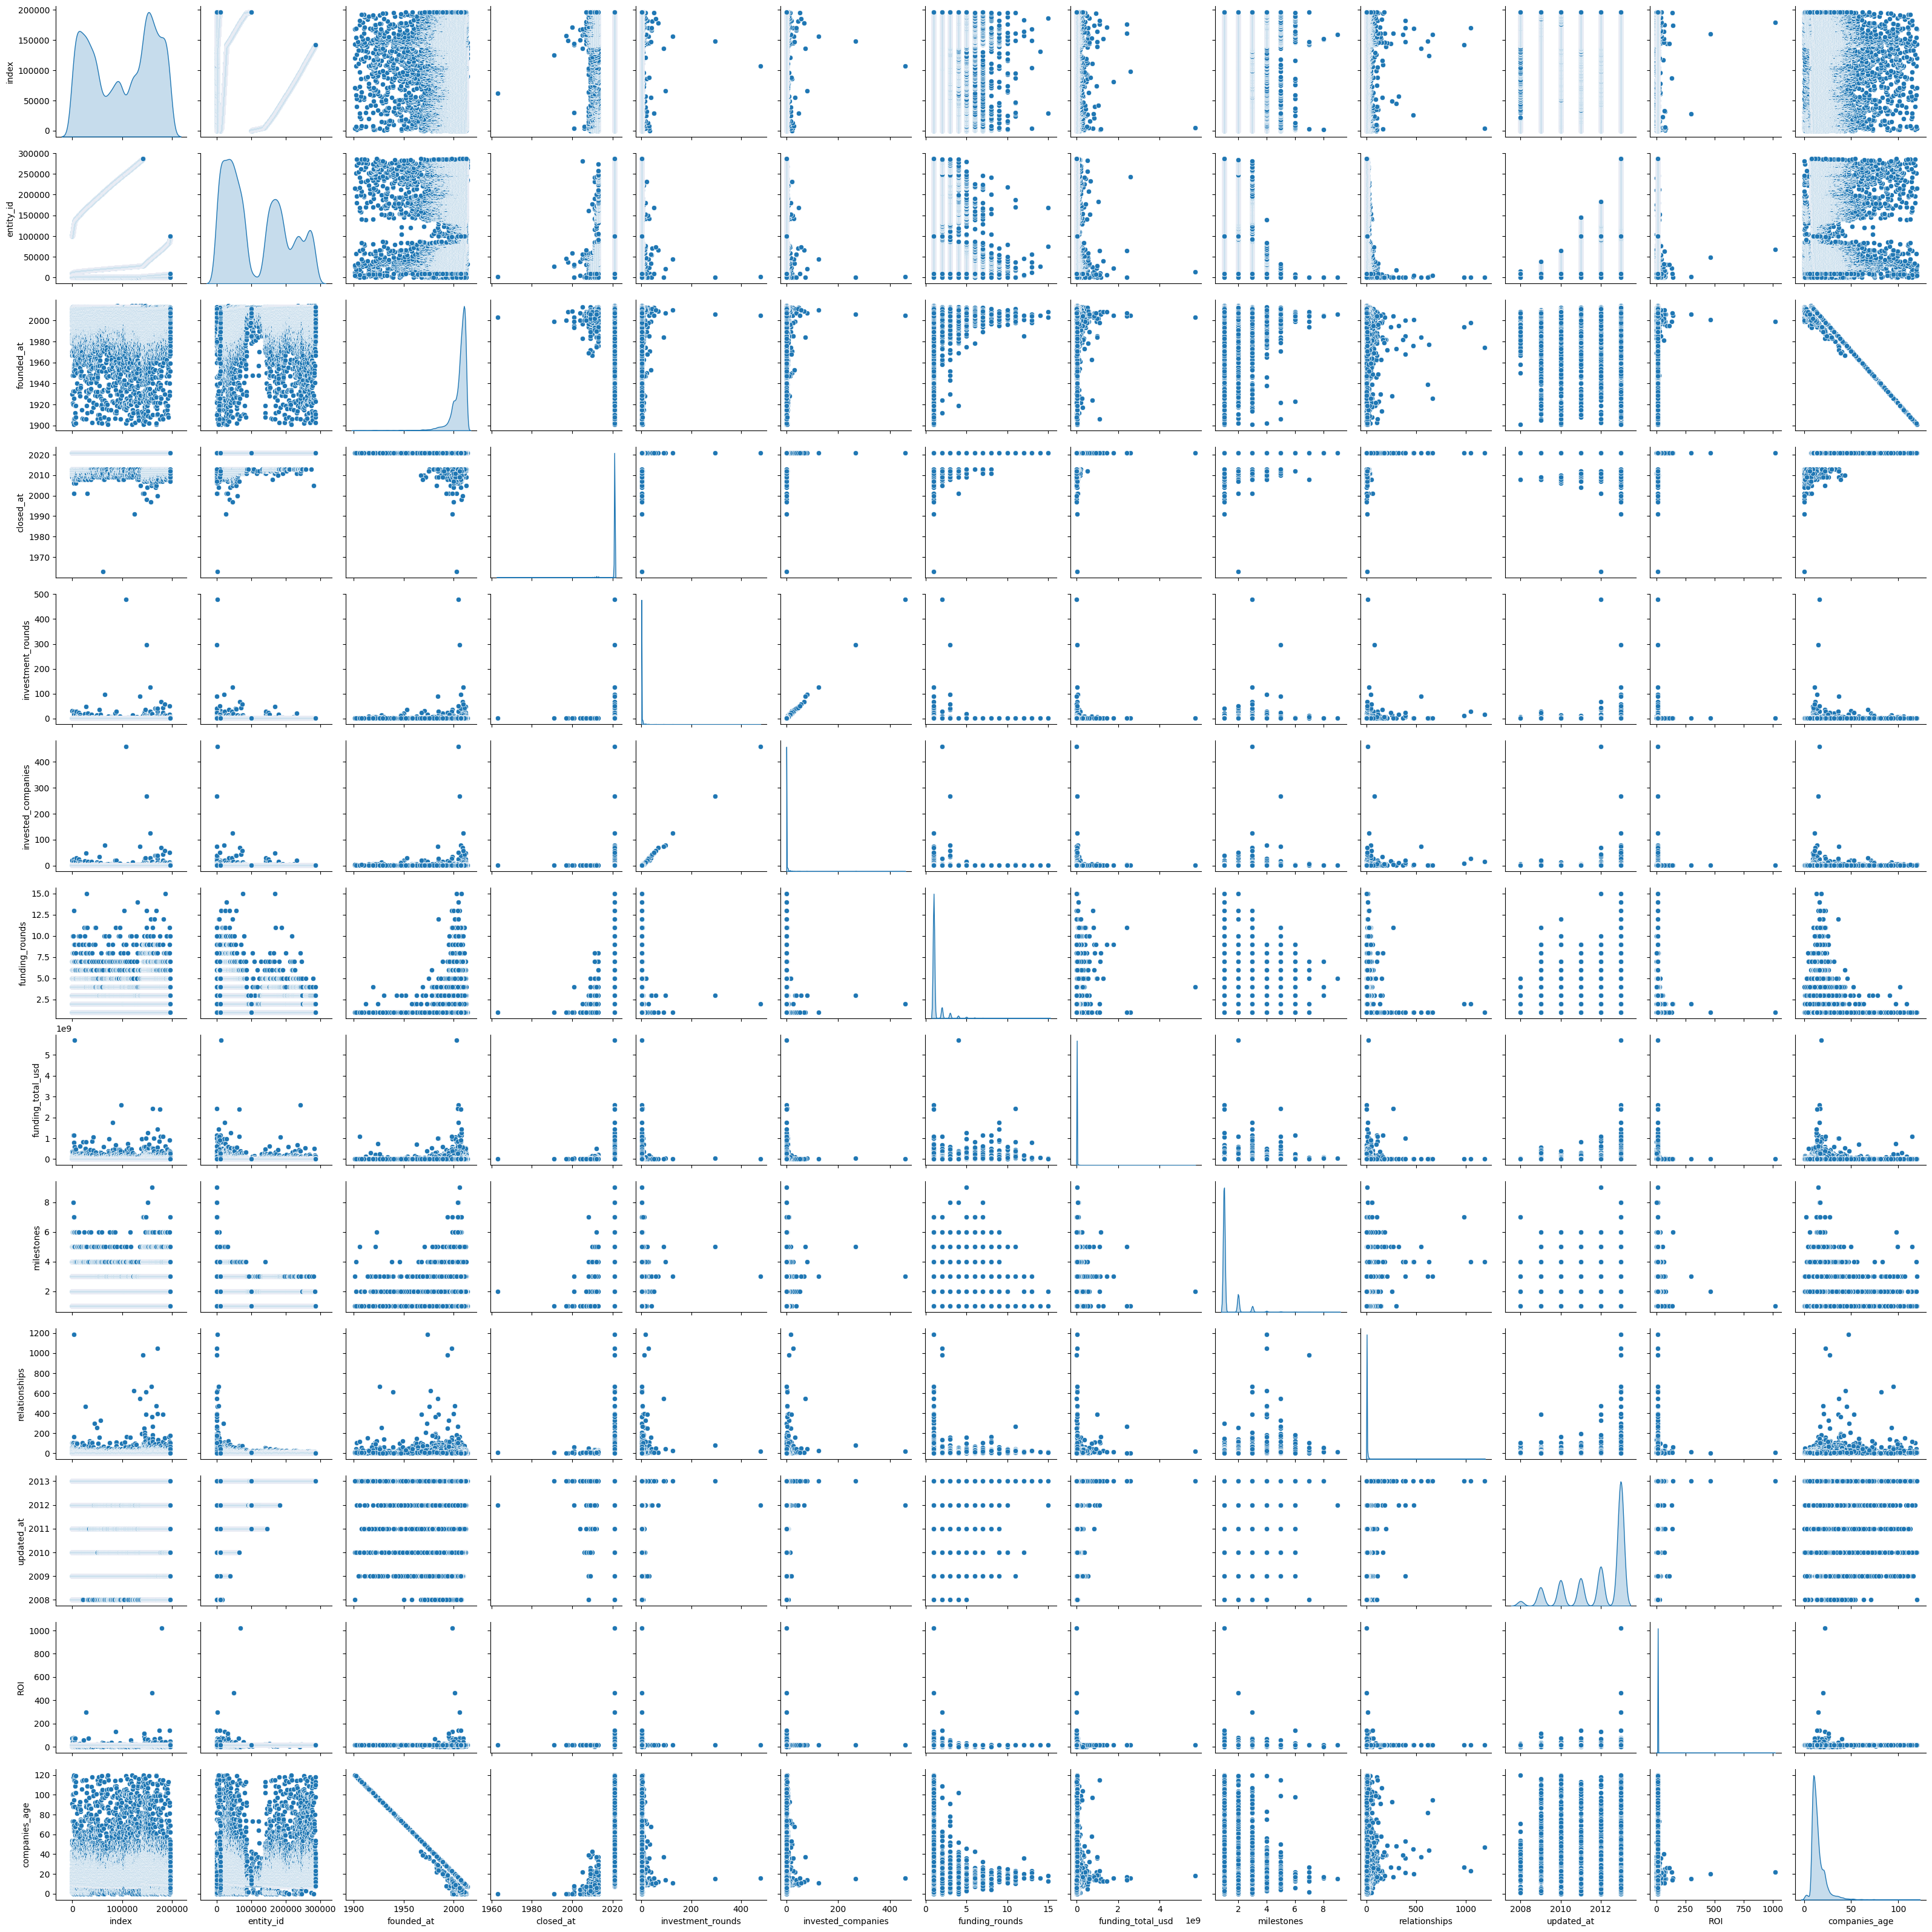

In [56]:
sns.pairplot(data, diag_kind = 'kde')

**NORMAL DISTRIBUTION**

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


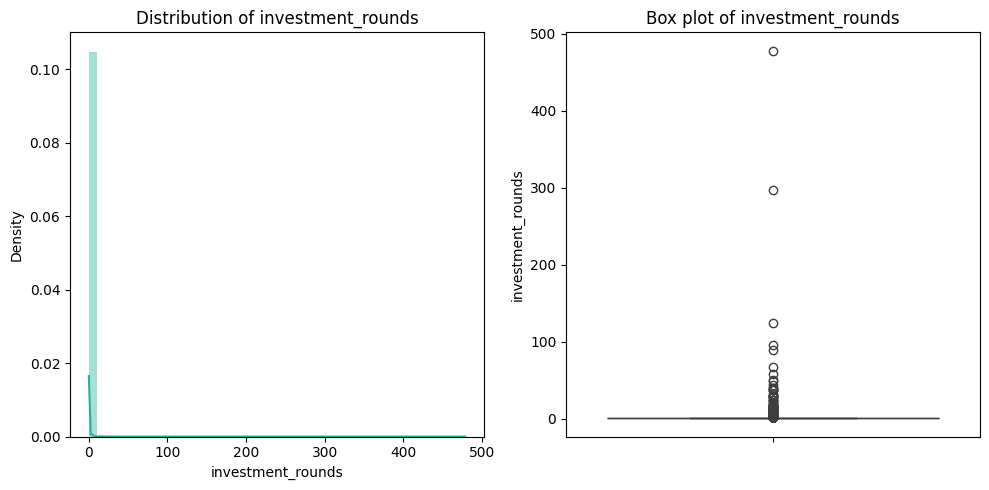

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


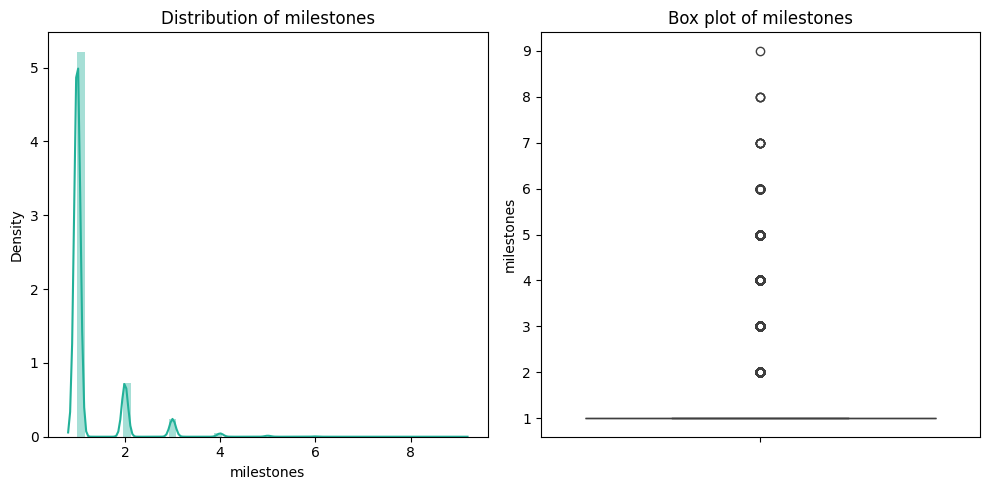

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


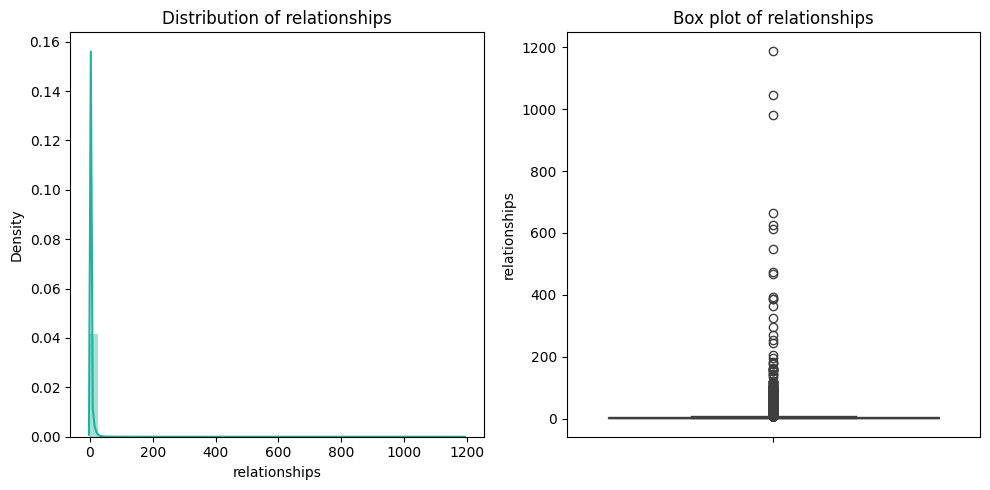

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


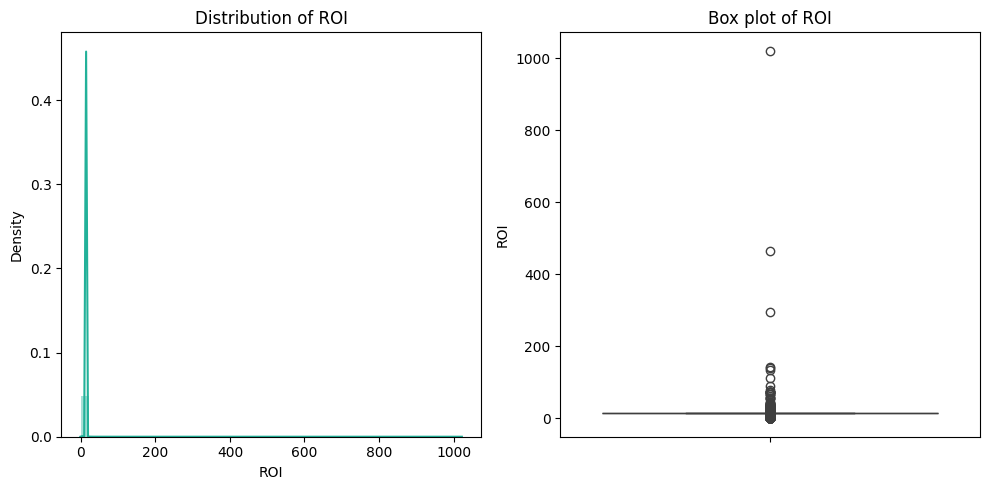

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


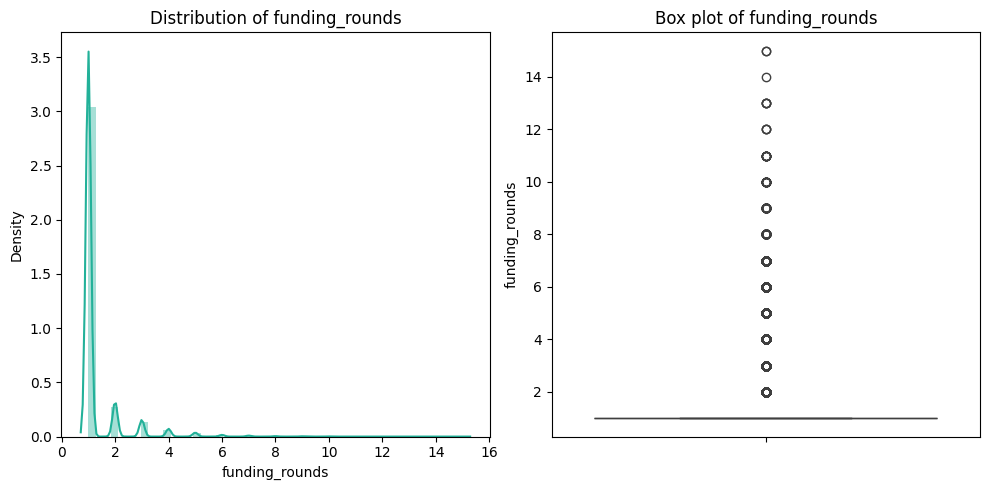

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


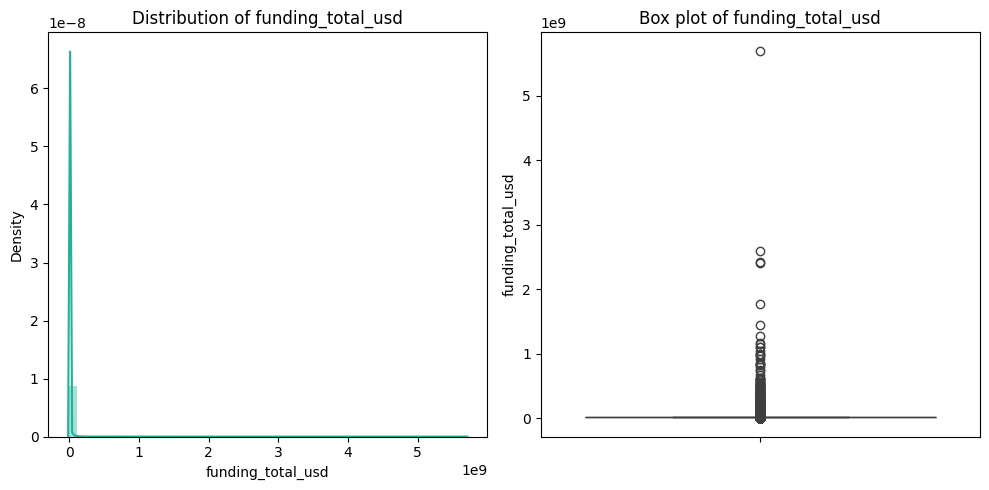

<ipython-input-57-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


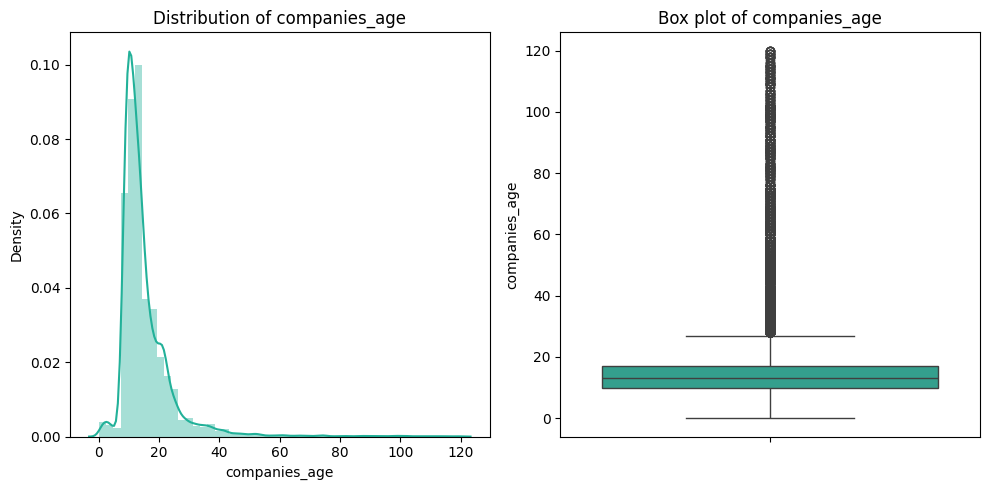

(64094, 18)


In [57]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age']:
    check_outliers(i)

print(data.shape)

**Dataset is not normally distributed.Dataset is very much skewed.Dataset will also have many outliers.**

**BEFORE REMOVING THE OUTLIERS**

In [58]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.409400e+04,64094.000000
mean,1.581978e+07,1.287749
std,3.950322e+07,0.873294
min,2.910000e+02,1.000000
25%,1.500000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,5.700000e+09,15.000000


**CALCULATING THE QUARTILES**

In [59]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

<ipython-input-59-51b523eeaa4f>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-59-51b523eeaa4f>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


**REMOVING OUTLIERS USING IQR METHODS**

In [60]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078]),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011-01-01,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008-01-01,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008-01-01,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008-01-01,2013,14.41045,13.0


**REMOVING OUTLIERS USING IQR METHODS**

In [61]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011-01-01,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008-01-01,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008-01-01,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008-01-01,2013,14.41045,13.0


**AFTER REMOVING OUTLIERS**

**BOXPLOT FOR FUNDING_TOTAL_USD**

<Axes: ylabel='funding_total_usd'>

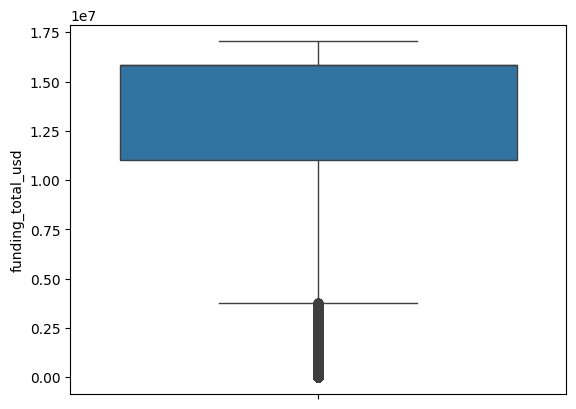

In [62]:
sns.boxplot(data['funding_total_usd'])

**BOXPLOT FOR FUNDING_ROUNDS**

<Axes: ylabel='funding_rounds'>

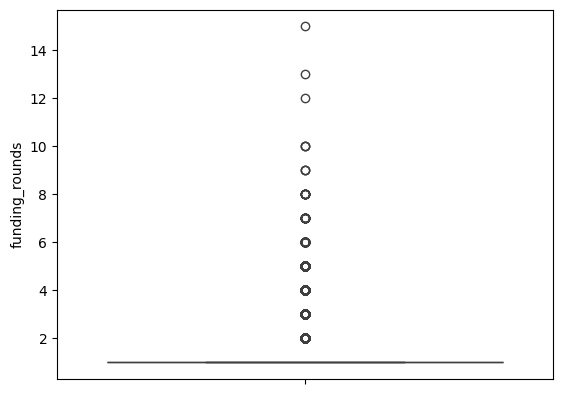

In [63]:
sns.boxplot(data['funding_rounds'])

**ENCODING THE CATEGORY CODE COLUMN BY REPLACE METHOD**

In [64]:
data['category_code'] = data['category_code'].replace(['public_relations','hardware','network_hosting','education','search','cleantech','analytics','finance','social','security','health','medical','semiconductor','legal','travel','news','manufacturing','fashion','hospitality','real_estate','photo_video','messaging','music','local','sports','transportation','nonprofit','automotive','design','nanotech','pets','government'],'other')

**COUNTING THE VALUES OF CATEGORY CODE VALUES**

In [65]:
data['category_code'].value_counts()

other          19106
software       10948
web             7878
ecommerce       4885
mobile          3716
advertising     3583
consulting      2804
games_video     2789
enterprise      2449
biotech         1911
Name: category_code, dtype: int64

**ENCODING THE COUNTRY CODE COLUMN**

In [66]:
top = ['USA','GBR','IND','CAN','DEU','FRA','AUS','ESP','ISR','NLD']

**UPDATING THE VALUES IN COUNTRY CODE**

In [67]:
data.loc[~data['country_code'].isin(top),'country_code'] = 'other'

**COUNTING THE VALUES OF COUNTRY CODE VALUES**

In [68]:
data['country_code'].value_counts()

USA      33820
other     9663
GBR       5047
IND       3014
CAN       2625
DEU       1364
FRA       1216
AUS       1031
ESP        884
ISR        751
NLD        654
Name: country_code, dtype: int64

**ONE HOT ENCODING TO CREATE THE DUMMY VARIABLES FOR CATEGORICAL COLUMNS**

In [69]:
data = pd.get_dummies(data, columns = ['category_code','country_code'])

**DROPPING THE COLUMNS OF NAME AND INVESTED_COMPANIES**

In [70]:
data.drop(columns = ['name','invested_companies'],inplace = True)

**SHAPE AFTER ENCODING THE DATASET**

In [71]:
data.shape

(60069, 35)

**IMBALANDED TARGET COLUMN**

**COUNTING THE VALUES OF STATE**

In [72]:
data.status.value_counts()

operating    54823
acquired      3337
closed        1492
ipo            417
Name: status, dtype: int64

**REPLACEING THE STATUS COLUMN VALUES WITH NUMERICAL VALUES**

In [73]:
data['status'] = data['status'].replace('operating',1)
data['status'] = data['status'].replace('ipo',1)
data['status'] = data['status'].replace('closed',0)
data['status'] = data['status'].replace('acquired',0)

**SPLITTING THE DATA INTO TRAINING AND TESTING**

In [74]:
x = data.drop('status',axis = 1)
y = data.status

**TRAINING 75% AND TESTING 25%**

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

**DROP ORIGINAL DATETIME COLUMNS**

In [78]:
# Drop the original datetime columns
data = data.drop(['founded_at', 'closed_at'], axis=1)


**CONVERT  FOUNDED_AT COLUMN INTO DATETIME FORMAT**

In [81]:
# Convert 'founded_at' column to datetime format
x_train['founded_at'] = pd.to_datetime(x_train['founded_at'])


**DATATYPES OF XTRAIN**

In [82]:
print(x_train.dtypes)


index                                 int64
entity_id                             int64
founded_at                   datetime64[ns]
closed_at                           float64
investment_rounds                   float64
funding_rounds                      float64
funding_total_usd                   float64
milestones                          float64
relationships                       float64
created_at                   datetime64[ns]
updated_at                            int64
ROI                                 float64
companies_age                       float64
category_code_advertising             uint8
category_code_biotech                 uint8
category_code_consulting              uint8
category_code_ecommerce               uint8
category_code_enterprise              uint8
category_code_games_video             uint8
category_code_mobile                  uint8
category_code_other                   uint8
category_code_software                uint8
category_code_web               

**NEARMISS**

In [84]:
# Define the list of datetime columns to drop
datetime_columns = ['founded_at', 'created_at']

# Drop datetime columns
x_train = x_train.drop(datetime_columns, axis=1)

# Now try using NearMiss again
ds = NearMiss()
x_train_nm, y_train_nm = ds.fit_resample(x_train, y_train)


**BEFORE FIT AND AFTER FIT**

In [85]:
from collections import Counter

# Your code here

print('Before Fit: {}'.format(Counter(y_train)))
print('After Fit: {}'.format(Counter(y_train_nm)))


Before Fit: Counter({1: 41459, 0: 3592})
After Fit: Counter({0: 3592, 1: 3592})


In [86]:
y_train_nm = y

**MUTUAL INFORMATION**

In [87]:
from sklearn.feature_selection import mutual_info_regression

In [88]:
numeric_df = data.select_dtypes(include='number').dropna()


In [89]:
target_variable = 'ROI'
X = numeric_df.drop(columns=[target_variable])
y = numeric_df[target_variable]


In [90]:
mutual_info_values = mutual_info_regression(X, y)


In [91]:
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mutual_info_values})


In [92]:
print(mutual_info_df)


                      Feature  Mutual_Information
0                       index            0.000666
1                   entity_id            0.003123
2                      status            0.017097
3           investment_rounds            0.000000
4              funding_rounds            0.004700
5           funding_total_usd            0.002034
6                  milestones            0.000000
7               relationships            0.002689
8                  updated_at            0.000000
9               companies_age            0.006341
10  category_code_advertising            0.000000
11      category_code_biotech            0.000000
12   category_code_consulting            0.003376
13    category_code_ecommerce            0.000000
14   category_code_enterprise            0.001793
15  category_code_games_video            0.003527
16       category_code_mobile            0.000000
17        category_code_other            0.000000
18     category_code_software            0.000000


**PCA**

In [93]:
X = x_train_nm.copy()
pca = PCA(n_components=2)
pca_X= pca.fit_transform(X)

In [94]:
loadings = pd.DataFrame(
   data = pca_X, columns = ['principal component 1', 'principal component 2']
)
loadings['y']=y_train_nm
loadings

,principal component 1,principal component 2,y
0,1.270420e+07,104689.414053,NaN
1,1.280420e+07,104675.442419,1.0
2,-2.665598e+06,95943.600518,1.0
3,2.114040e+06,-70325.846889,1.0
4,-2.665701e+06,-21602.236637,0.0
...,...,...,...
7179,-2.665577e+06,120724.163551,1.0
7180,-2.665579e+06,117776.884870,1.0
7181,-2.665568e+06,129974.515165,1.0
7182,-2.665718e+06,-40884.796729,1.0


In [95]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99792582e-01, 1.28630126e-04])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

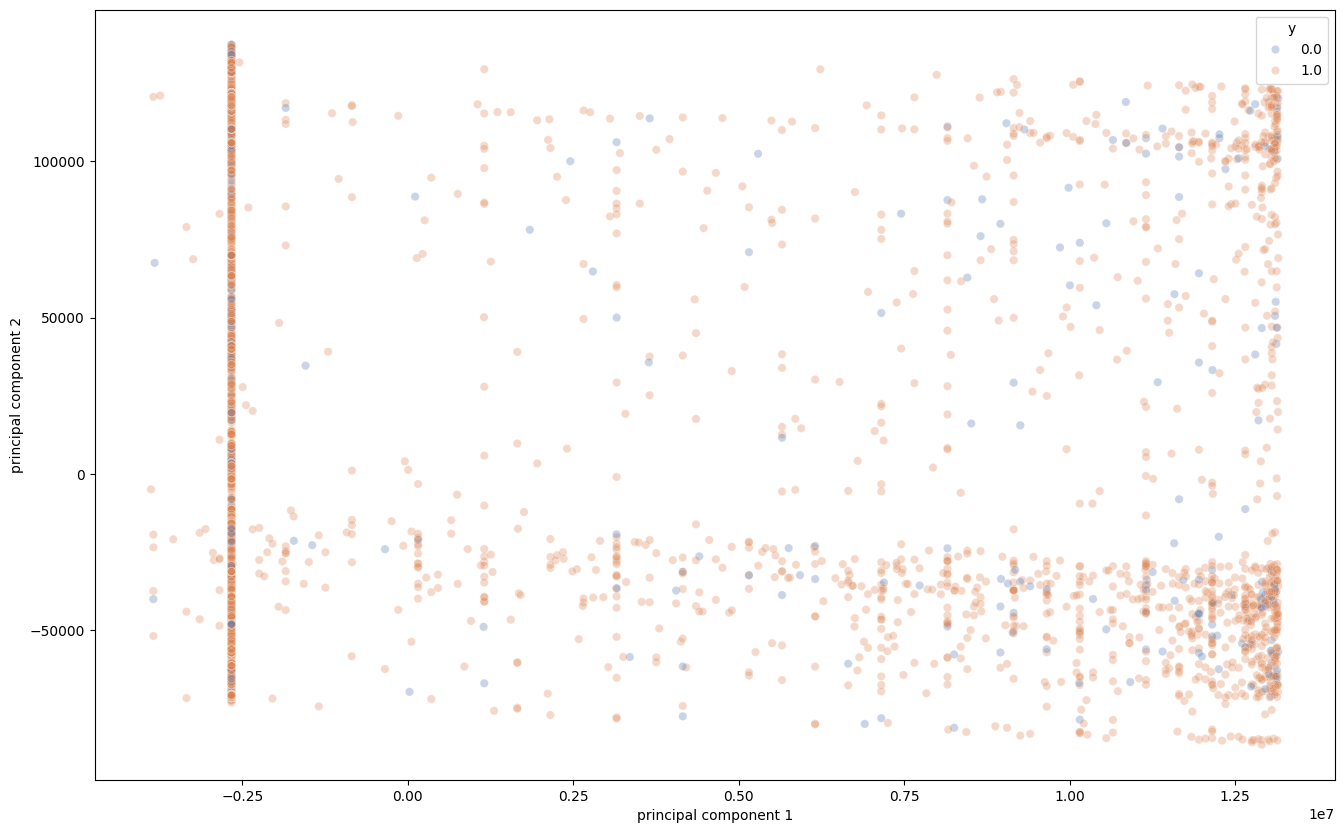

In [96]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=loadings,
    legend="full",
    alpha=0.3,
    palette="deep"
)

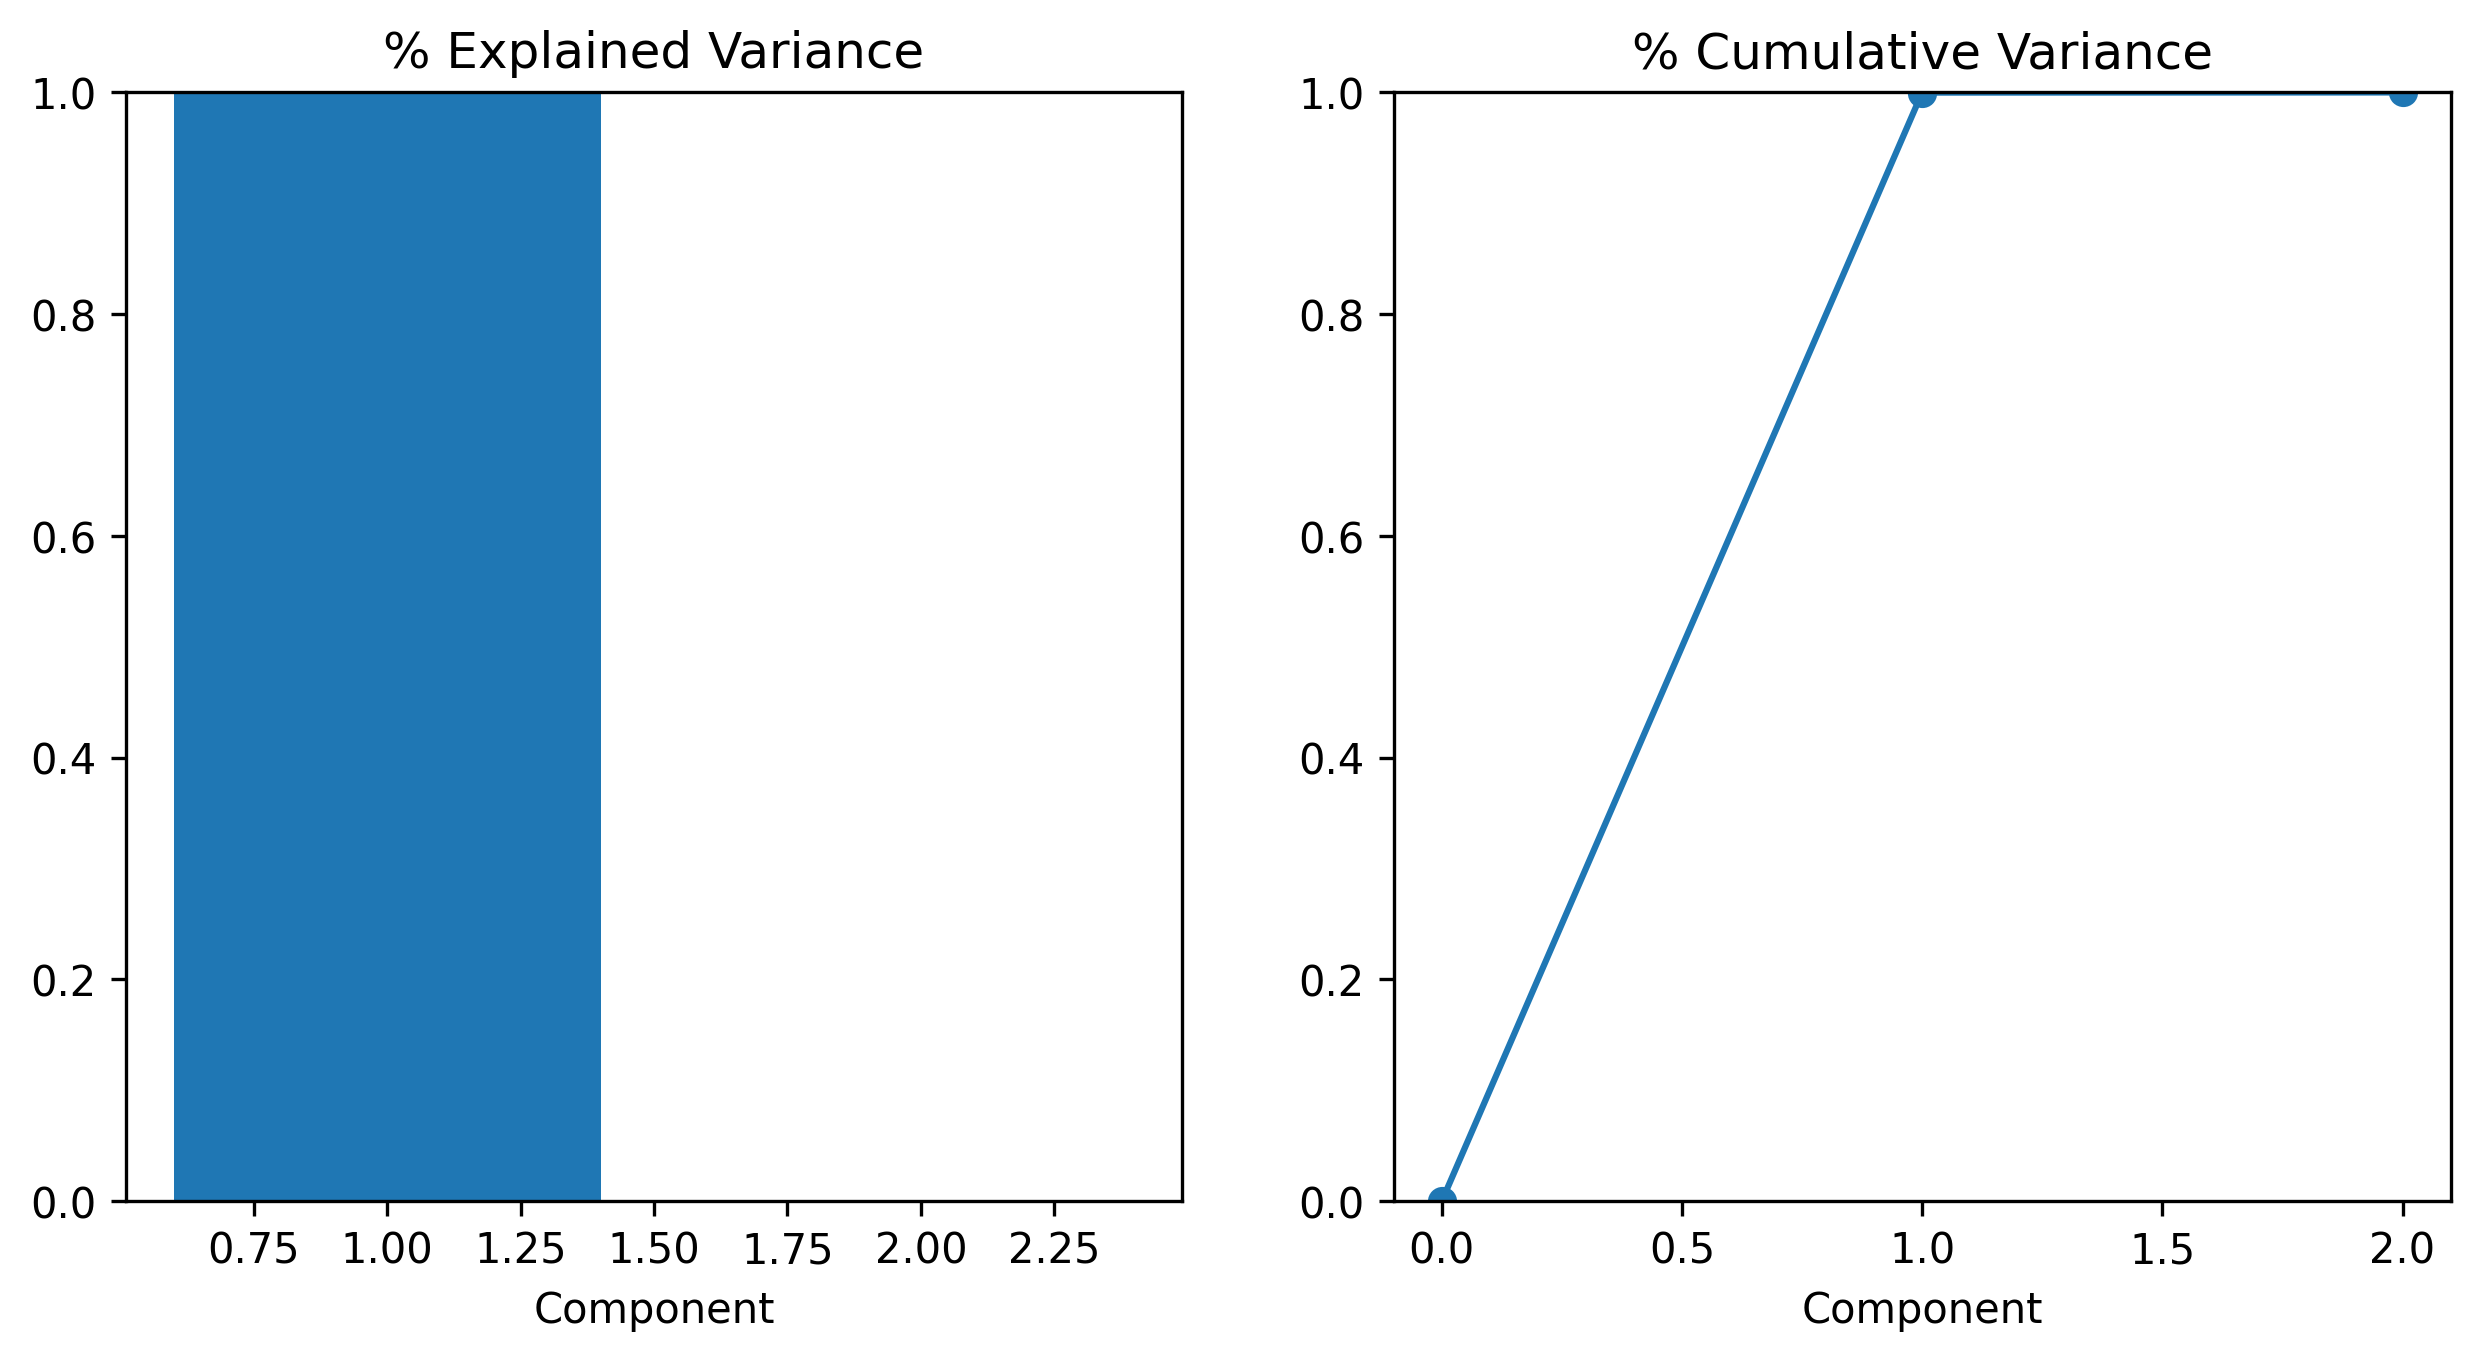

In [97]:
def plot_variance(pca, width=10, dpi=200):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )

    fig.set(figwidth=10, dpi=300)
    return axs
plot_variance(pca);

In [116]:
data.columns


Index(['status', 'investment_rounds', 'funding_rounds', 'funding_total_usd',
       'milestones', 'relationships', 'created_at', 'updated_at', 'ROI',
       'companies_age', 'category_code_advertising', 'category_code_biotech',
       'category_code_consulting', 'category_code_ecommerce',
       'category_code_enterprise', 'category_code_games_video',
       'category_code_mobile', 'category_code_other', 'category_code_software',
       'category_code_web', 'country_code_AUS', 'country_code_CAN',
       'country_code_DEU', 'country_code_ESP', 'country_code_FRA',
       'country_code_GBR', 'country_code_IND', 'country_code_ISR',
       'country_code_NLD', 'country_code_USA', 'country_code_other'],
      dtype='object')

In [100]:
data.duplicated().sum()

19120

In [101]:
x = data.drop('status',axis = 1)
y = y_train_nm

In [105]:
from sklearn.preprocessing import StandardScaler

# Define the list of datetime columns to exclude from scaling
datetime_columns = ['founded_at', 'created_at']

# Check if the columns exist before dropping
columns_to_drop = [col for col in datetime_columns if col in x.columns]
if columns_to_drop:
    # Exclude datetime columns from x before scaling
    x_scaled = x.copy()
    x_scaled = x_scaled.drop(columns_to_drop, axis=1)

    # Scale the remaining features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_scaled)
else:
    # No datetime columns found in x, proceed with scaling all features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)


In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_classifier(classifier, x_train, x_test, y_train, y_test, train=True):
    """
    Evaluate a classifier on either training or testing data.

    Parameters:
    - classifier: The classifier object to evaluate.
    - x_train: Training feature data.
    - x_test: Testing feature data.
    - y_train: Training target data.
    - y_test: Testing target data.
    - train: If True, evaluate on training data; if False, evaluate on testing data.

    Returns:
    None
    """
    if train:
        y_pred_train = classifier.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train, y_pred_train))
        print('\n ----- Classification Report ----- \n', classification_report(y_train, y_pred_train))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train, y_pred_train))
    else:
        y_pred_test = classifier.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test, y_pred_test))
        print('\n ----- Classification Report ----- \n', classification_report(y_test, y_pred_test))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test, y_pred_test))


In [108]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))

    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

In [109]:
def roc_curve_plot(clas, x_test, y_test):
    print('Roc Curve')
    plot_roc_curve(clas, x_test, y_test)

def confusion_matrix_plot(clas, x_test, y_test):
    pred = clas.predict(x_test)
    print('Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test.values.ravel(),pred), annot=True,fmt="d")
    plt.rcParams["figure.figsize"]=(5,5)
    plt.show()

In [110]:
def sample(clas,x_test,x_train):
    y_test_pred = clas.predict(x_test)
    y_train_pred = clas.predict(x_train)
    print('the first 20 samples from dataset: ')
    print(y_train_pred[0:20])
    print(y_test_pred[0:20])

In [117]:
data.shape

(60069, 31)